## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [5]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']

In [7]:
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()

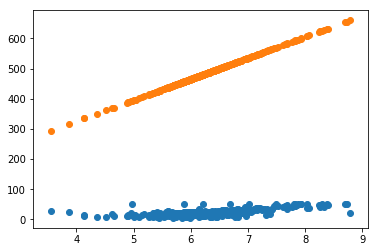

In [8]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

import random
k = random.randint(-100, 100)
b = random.randint(-100, 100)
X_rm = X[:, 5]
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

0 3097.7535287993505
200 74.05007079338405
300 73.42573251974117
700 71.49386113432128
900 70.43355202140297
1200 69.11373301362667
1600 67.50315195777556
1800 66.80120703039178
2100 65.82069983571691
2200 65.5431619307158
2500 64.61883533051021
2800 63.65729073688447


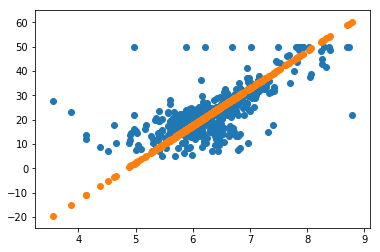

In [33]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

import random
direction=[(1,1),(1,-1),(-1,-1),(-1,1)]

def find_best_by_supervise(times):
    X_rm = X[:, 5]
    min_loss =float('inf')
    next_direction = random.choice(direction)
    scale = 0.1
    best_k = random.randint(-100, 100)
    best_b = random.randint(-100, 100)
    for i in range(times):
        k_k,b_k = next_direction
        k = best_k+k_k*scale
        b = best_b+b_k*scale
        new_price = [price(r, k, b) for r in X_rm]
        cur_loss = loss(y,new_price)
        if cur_loss<min_loss:
            min_loss = cur_loss
            if i%100==0:
                print(i,min_loss)
            next_direction = next_direction
            best_k = k
            best_b = b
            scale = 2*scale
            continue
        else:
#             print('change direction')
            next_direction=random.choice(direction)
            scale = 0.5*scale
            continue
    return best_k,best_b

k,b = find_best_by_supervise(3000)
draw_rm_and_price()
plt.scatter(X_rm, [price(r, k, b) for r in X_rm])

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:因为复杂的方程往往很难正确找到，而且我们也不知道它的具体形式是怎么样的，因此级数逼近也很难实现。而机器学习能够通过简单的表达式递归就能逼近这个方程

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:计算量大，并且没有正确的方向，很难逼近loss的极限

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二种方法比第一种要好，如果它找到了一个让loss减少的方向，会继续往这个方向进行下去。它的缺点是收敛速度是恒定的，不能很快的逼近正确值，并且scale决定了精度的下限。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度指数据变化最快的方向，可以是上升也可以是下降；Descent指的是下降的方向

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:机器学习是通过计算机寻找一个函数来逼近数据集。通过这个函数可以对数据进行预测

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [ ]:
import clawer

clawer.search('海淀五路居','平西路')

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)